In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('adult_sal.csv')

df.head()

,Unnamed: 0,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,32561.0,16281.000000,9399.695394,1.0,8141.0,16281.0,24421.0,32561.0
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hr_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [3]:
df.dtypes

Unnamed: 0        int64
age               int64
type_employer    object
fnlwgt            int64
education        object
education_num     int64
marital          object
occupation       object
relationship     object
race             object
sex              object
capital_gain      int64
capital_loss      int64
hr_per_week       int64
country          object
income           object
dtype: object

In [4]:
df = df.set_index('Unnamed: 0')

df

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
Unnamed: 0,,,,,,,,,,,,,,,
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
df['type_employer'].isnull().sum()

0

In [6]:
df['type_employer'].isna().sum()

0

In [7]:
df['type_employer'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
print('State-gov: ',df[df['type_employer'] == 'State-gov']['sex'].count())
print('Self-emp-not-inc: ',df[df['type_employer'] == 'Self-emp-not-inc']['sex'].count())
print('Private: ',df[df['type_employer'] == 'Private']['sex'].count())
print('Federal-gov: ',df[df['type_employer'] == 'Federal-gov']['sex'].count())
print('?: ',df[df['type_employer'] == '?']['sex'].count())
print('Self-emp-inc: ',df[df['type_employer'] == 'Self-emp-inc']['sex'].count())
print('Without-pay: ',df[df['type_employer'] == 'Without-pay']['sex'].count())
print('Never-worked: ',df[df['type_employer'] == 'Never-worked']['sex'].count())

State-gov:  1298
Self-emp-not-inc:  2541
Private:  22696
Federal-gov:  960
?:  1836
Self-emp-inc:  1116
Without-pay:  14
Never-worked:  7


In [9]:
#Without-pay and never-worked people can be one group. Because they are both unemployed.

def grouping(data):
    if data == 'Without-pay' or data == 'Never-worked':
        data = 'Unemployed'
        return data
    else:
        return data
    

df['type_employer'] = df['type_employer'].apply(lambda x: grouping(x))

df

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
Unnamed: 0,,,,,,,,,,,,,,,
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
df['type_employer'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Unemployed'], dtype=object)

In [11]:
df[df['type_employer'] == 'Unemployed']['sex'].count()

21

In [12]:
# Self-emp-not-inc and Self-emp-inc are also can be group. Because they are both self-employed

def grouping2(data):
    if data=='Self-emp-inc' or data=='Self-emp-not-inc':
        data = 'Self-Employed'
        return data
    else:
        return data
    

    
df['type_employer'] = df['type_employer'].apply(lambda x: grouping2(x))
        
df['type_employer'].unique()

array(['State-gov', 'Self-Employed', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Unemployed'], dtype=object)

In [13]:
def grouping3(data):
    if data=='State-gov' or data=='Local-gov':
        data = 'SL-gov'
        return data
    else:
        return data
    
df['type_employer'] = df['type_employer'].apply(lambda x: grouping3(x))
        
df['type_employer'].unique()

array(['SL-gov', 'Self-Employed', 'Private', 'Federal-gov', '?',
       'Unemployed'], dtype=object)

In [14]:
df['marital'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital, dtype: int64

In [15]:
def group_marital(data):
    if data=='Separated' or data=='Divorced' or data=='Widowed':
        data = 'Not-Married'
        return data
    elif data=='Never-married':
        return data
    else:
        data = 'Married'
        return data
    
    
df['marital'] = df['marital'].apply(lambda x: group_marital(x))

df['marital'].value_counts()      

Married          15417
Never-married    10683
Not-Married       6461
Name: marital, dtype: int64

In [16]:
df['country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [17]:
asia = ['China','Hong','India','Iran','Cambodia','Japan','Laos', 'Philippines','Vietnam','Taiwan','Thailand']
NA = ['Canada','United-States','Puerto-Rico']
EU = ['England','France','Germany','Greece','Holand-Netherlands','Hungary','Ireland','Italy','Poland','Portugal','Scotland', 'Yugoslavia']
LA_and_SA = ['Columbia','Cuba','Dominican-Republic','Ecuador','El-Salvador','Guatemala','Haiti','Honduras','Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru','Jamaica','Trinadad&Tobago']
other = ['South']

def grouping_countries(data):
    if data in asia:
        data = 'Asia'
        return data
    elif data in NA:
        data = 'North.America'
        return data
    elif data in EU:
        data = 'Europe'
        return data
    elif data in LA_and_SA:
        data = 'Latin.and.South.America'
        return data
    else:
        data = 'Others'
        return data
    
    
df['country'] = df['country'].apply(lambda x: grouping_countries(x))

df['country'].value_counts()

North.America              29405
Latin.and.South.America     1301
Asia                         671
Others                       663
Europe                       521
Name: country, dtype: int64

In [18]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [19]:
def grouping_relations(data):
    if data == 'Husband' or data == 'Wife' or data== 'Own-child' or data == 'Other-relative':
        data = 'In-family'
        return data
    else:
        data = 'Not-in-family'
        return data
    
    
    
df['relationship'] = df['relationship'].apply(lambda x: grouping_relations(x))

df['relationship'].value_counts()

In-family        20810
Not-in-family    11751
Name: relationship, dtype: int64

In [20]:
df

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
Unnamed: 0,,,,,,,,,,,,,,,
1,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,Self-Employed,83311,Bachelors,13,Married,Exec-managerial,In-family,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,11th,7,Married,Handlers-cleaners,In-family,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,Married,Prof-specialty,In-family,Black,Female,0,0,40,Latin.and.South.America,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,Private,257302,Assoc-acdm,12,Married,Tech-support,In-family,White,Female,0,0,38,North.America,<=50K
32558,40,Private,154374,HS-grad,9,Married,Machine-op-inspct,In-family,White,Male,0,0,40,North.America,>50K
32559,58,Private,151910,HS-grad,9,Not-Married,Adm-clerical,Not-in-family,White,Female,0,0,40,North.America,<=50K


In [21]:
#Missing value

df = df.replace('?', np.NaN)

df

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
Unnamed: 0,,,,,,,,,,,,,,,
1,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,Self-Employed,83311,Bachelors,13,Married,Exec-managerial,In-family,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,11th,7,Married,Handlers-cleaners,In-family,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,Married,Prof-specialty,In-family,Black,Female,0,0,40,Latin.and.South.America,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,Private,257302,Assoc-acdm,12,Married,Tech-support,In-family,White,Female,0,0,38,North.America,<=50K
32558,40,Private,154374,HS-grad,9,Married,Machine-op-inspct,In-family,White,Male,0,0,40,North.America,>50K
32559,58,Private,151910,HS-grad,9,Not-Married,Adm-clerical,Not-in-family,White,Female,0,0,40,North.America,<=50K


<AxesSubplot:>

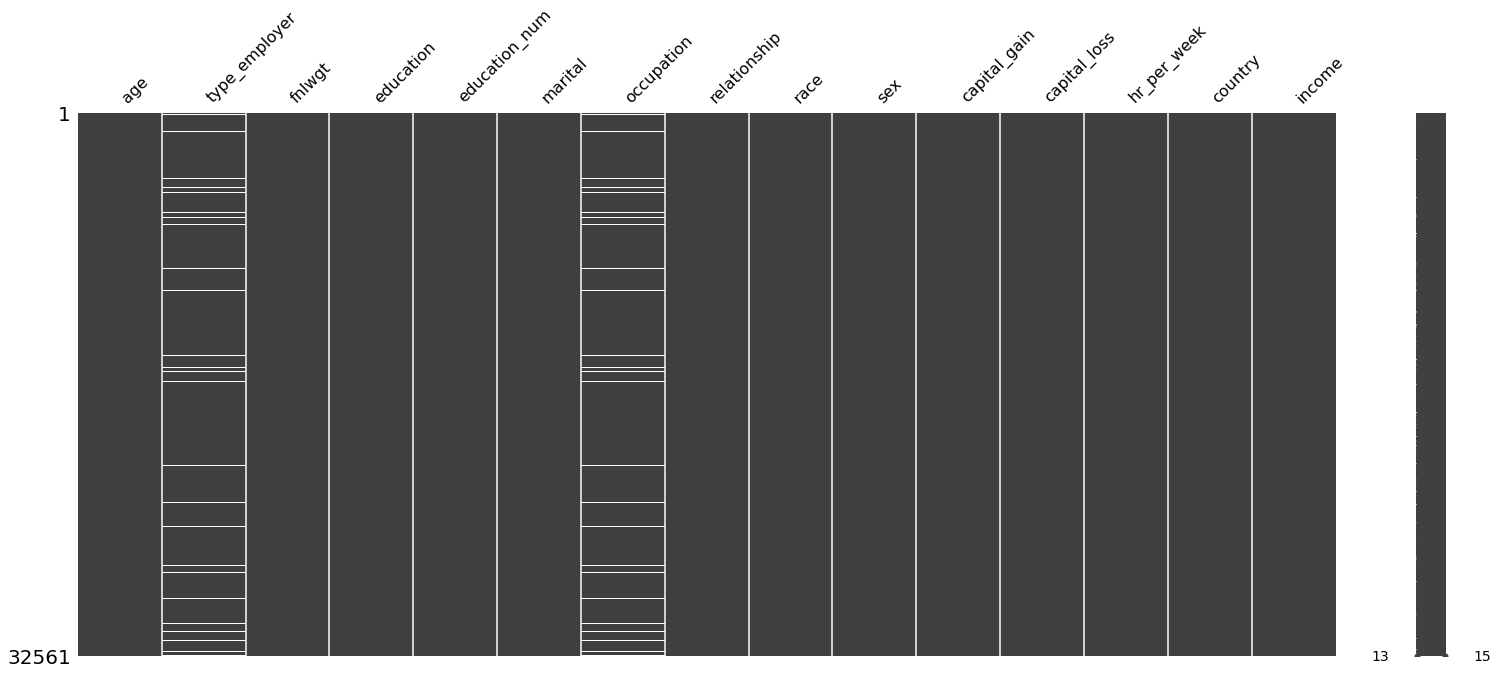

In [23]:
import missingno as msno

msno.matrix(df)

<AxesSubplot:>

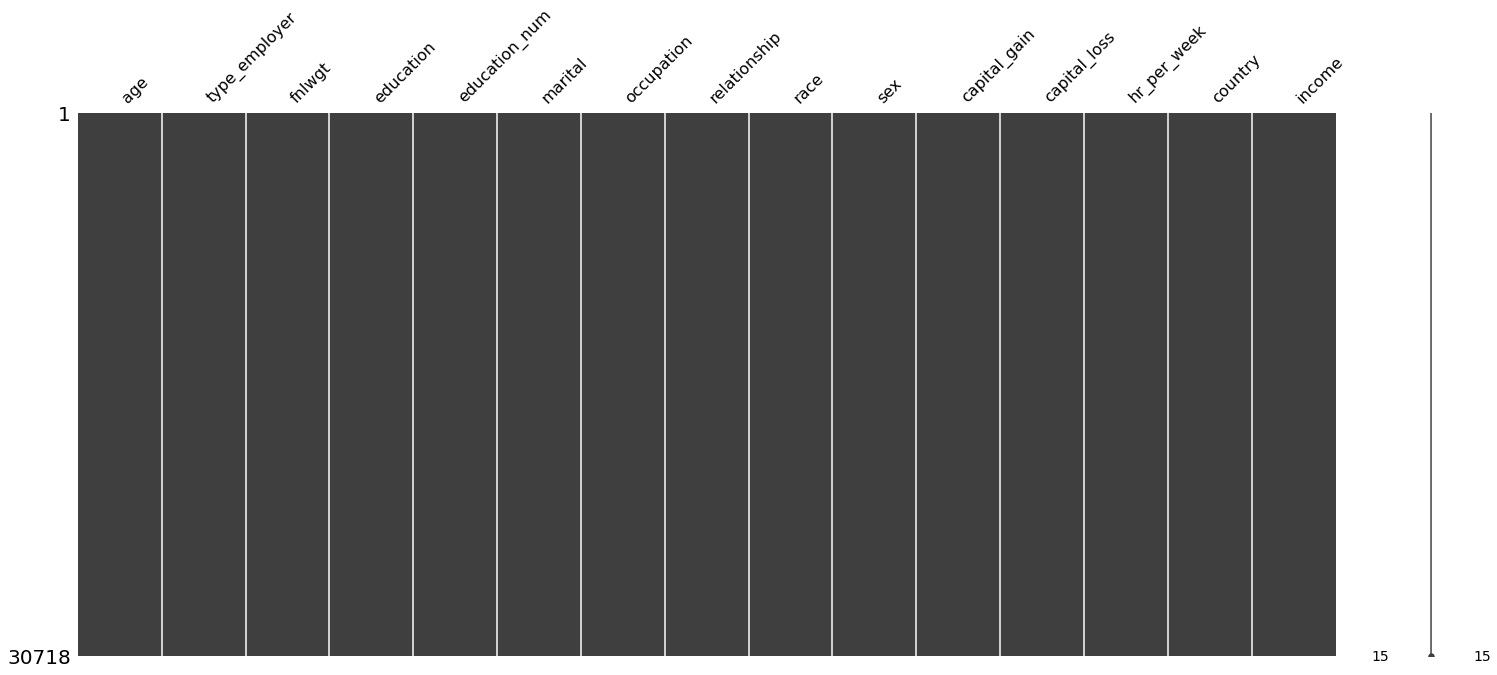

In [24]:
df = df.dropna()

msno.matrix(df)

<AxesSubplot:xlabel='age', ylabel='Count'>

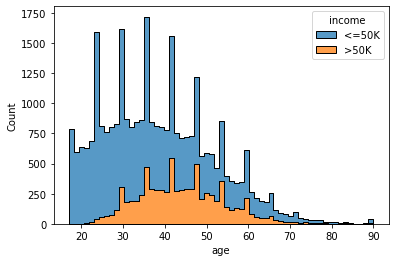

In [25]:
import seaborn as sns

sns.histplot(x=df['age'], hue=df['income'],multiple="stack",element="step" )

<AxesSubplot:xlabel='hr_per_week', ylabel='Count'>

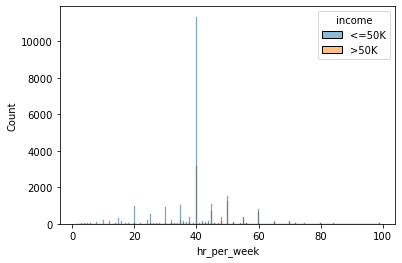

In [26]:
sns.histplot(x=df['hr_per_week'], hue=df['income'])

In [27]:
df.rename(columns={'country': 'region'}, inplace=True)

df.head()

C:\Users\061489\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
Unnamed: 0,,,,,,,,,,,,,,,
1,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,Self-Employed,83311,Bachelors,13,Married,Exec-managerial,In-family,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,11th,7,Married,Handlers-cleaners,In-family,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,Married,Prof-specialty,In-family,Black,Female,0,0,40,Latin.and.South.America,<=50K


<AxesSubplot:xlabel='region', ylabel='Count'>

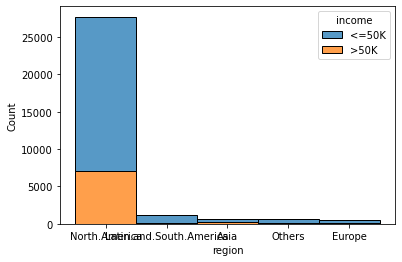

In [28]:
sns.histplot(x=df.region, hue=df.income, multiple='stack')

In [29]:
df.columns

Index(['age', 'type_employer', 'fnlwgt', 'education', 'education_num',
       'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hr_per_week', 'region', 'income'],
      dtype='object')

In [31]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols='marital', handle_unknown='return_nan', return_df=True, use_cat_names=True)
data_encoded = encoder.fit_transform(df)
data_encoded

,age,type_employer,fnlwgt,education,education_num,marital_Never-married,marital_Married,marital_Not-Married,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
Unnamed: 0,,,,,,,,,,,,,,,,,
1,39,SL-gov,77516,Bachelors,13,1.0,0.0,0.0,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,Self-Employed,83311,Bachelors,13,0.0,1.0,0.0,Exec-managerial,In-family,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,0.0,0.0,1.0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,11th,7,0.0,1.0,0.0,Handlers-cleaners,In-family,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,0.0,1.0,0.0,Prof-specialty,In-family,Black,Female,0,0,40,Latin.and.South.America,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,Private,257302,Assoc-acdm,12,0.0,1.0,0.0,Tech-support,In-family,White,Female,0,0,38,North.America,<=50K
32558,40,Private,154374,HS-grad,9,0.0,1.0,0.0,Machine-op-inspct,In-family,White,Male,0,0,40,North.America,>50K
32559,58,Private,151910,HS-grad,9,0.0,0.0,1.0,Adm-clerical,Not-in-family,White,Female,0,0,40,North.America,<=50K


In [32]:
df['education'].value_counts()

HS-grad         9968
Some-college    6775
Bachelors       5182
Masters         1675
Assoc-voc       1321
11th            1056
Assoc-acdm      1020
10th             831
7th-8th          573
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64

In [33]:
encoder1 = ce.OrdinalEncoder(cols=['education'], return_df=True, mapping=[{'col' : 'education',
                                                                           'mapping' : {'Preschool' : 0,
                                                                                       '1st-4th' : 1,
                                                                                       '5th-6th' : 2,
                                                                                       '7th-8th' : 3,
                                                                                       '9th' : 4,
                                                                                       '10th': 5,
                                                                                       '11th': 6,
                                                                                       '12th': 7,
                                                                                       'HS-grad': 8,
                                                                                       'Some-college': 9,
                                                                                       'Bachelors':10,
                                                                                       'Masters':11,
                                                                                       'Assoc-voc':12,
                                                                                       'Assoc-acdm':13,
                                                                                       'Prof-school':14,
                                                                                       'Doctorate':15}}])

data_encoded = encoder1.fit_transform(data_encoded)

data_encoded

,age,type_employer,fnlwgt,education,education_num,marital_Never-married,marital_Married,marital_Not-Married,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
Unnamed: 0,,,,,,,,,,,,,,,,,
1,39,SL-gov,77516,10,13,1.0,0.0,0.0,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,Self-Employed,83311,10,13,0.0,1.0,0.0,Exec-managerial,In-family,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,8,9,0.0,0.0,1.0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,6,7,0.0,1.0,0.0,Handlers-cleaners,In-family,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,10,13,0.0,1.0,0.0,Prof-specialty,In-family,Black,Female,0,0,40,Latin.and.South.America,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,Private,257302,13,12,0.0,1.0,0.0,Tech-support,In-family,White,Female,0,0,38,North.America,<=50K
32558,40,Private,154374,8,9,0.0,1.0,0.0,Machine-op-inspct,In-family,White,Male,0,0,40,North.America,>50K
32559,58,Private,151910,8,9,0.0,0.0,1.0,Adm-clerical,Not-in-family,White,Female,0,0,40,North.America,<=50K


In [34]:
data_encoded[data_encoded['education'] == 8]['education_num']

Unnamed: 0
3        9
8        9
17       9
18       9
22       9
        ..
32548    9
32558    9
32559    9
32560    9
32561    9
Name: education_num, Length: 9968, dtype: int64

In [35]:
data_encoded.drop('education_num', axis=1, inplace=True)

data_encoded

,age,type_employer,fnlwgt,education,marital_Never-married,marital_Married,marital_Not-Married,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
Unnamed: 0,,,,,,,,,,,,,,,,
1,39,SL-gov,77516,10,1.0,0.0,0.0,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,Self-Employed,83311,10,0.0,1.0,0.0,Exec-managerial,In-family,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,8,0.0,0.0,1.0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,6,0.0,1.0,0.0,Handlers-cleaners,In-family,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,10,0.0,1.0,0.0,Prof-specialty,In-family,Black,Female,0,0,40,Latin.and.South.America,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,Private,257302,13,0.0,1.0,0.0,Tech-support,In-family,White,Female,0,0,38,North.America,<=50K
32558,40,Private,154374,8,0.0,1.0,0.0,Machine-op-inspct,In-family,White,Male,0,0,40,North.America,>50K
32559,58,Private,151910,8,0.0,0.0,1.0,Adm-clerical,Not-in-family,White,Female,0,0,40,North.America,<=50K


In [36]:
encoder2 = ce.OneHotEncoder(cols=['relationship','race','sex','region','type_employer'], handle_unknown='return_nan', return_df=True, use_cat_names=True)
data_encoded = encoder2.fit_transform(data_encoded)

In [37]:
data_encoded['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [39]:
encoder3 = ce.OrdinalEncoder(cols=['occupation'], return_df=True, mapping=[{'col' : 'occupation',
                                                                           'mapping' : {'Handlers-cleaners' : 0,
                                                                                       'Farming-fishing' : 1,
                                                                                       'Transport-moving' : 2,
                                                                                       'Priv-house-serv' : 3,
                                                                                       'Protective-serv' : 4,
                                                                                       'Craft-repair': 6,
                                                                                       'Sales': 7,
                                                                                       'Adm-clerical': 10,
                                                                                       'Exec-managerial': 11,
                                                                                       'Armed-Forces': 12,
                                                                                       'Machine-op-inspct':9,
                                                                                       'Prof-specialty':13,
                                                                                       'Tech-support':8,
                                                                                       'Other-service':5,
                                                                                       }},
                                                                          {'col' : 'income',
                                                                          'mapping' : {'<=50K':0,
                                                                                      '>50K':1}}])

data_encoded = encoder3.fit_transform(data_encoded)

data_encoded

,age,type_employer_SL-gov,type_employer_Self-Employed,type_employer_Private,type_employer_Federal-gov,type_employer_Unemployed,fnlwgt,education,marital_Never-married,marital_Married,...,sex_Female,capital_gain,capital_loss,hr_per_week,region_North.America,region_Latin.and.South.America,region_Asia,region_Others,region_Europe,income
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,39,1.0,0.0,0.0,0.0,0.0,77516,10,1.0,0.0,...,0.0,2174,0,40,1.0,0.0,0.0,0.0,0.0,0
2,50,0.0,1.0,0.0,0.0,0.0,83311,10,0.0,1.0,...,0.0,0,0,13,1.0,0.0,0.0,0.0,0.0,0
3,38,0.0,0.0,1.0,0.0,0.0,215646,8,0.0,0.0,...,0.0,0,0,40,1.0,0.0,0.0,0.0,0.0,0
4,53,0.0,0.0,1.0,0.0,0.0,234721,6,0.0,1.0,...,0.0,0,0,40,1.0,0.0,0.0,0.0,0.0,0
5,28,0.0,0.0,1.0,0.0,0.0,338409,10,0.0,1.0,...,1.0,0,0,40,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,27,0.0,0.0,1.0,0.0,0.0,257302,13,0.0,1.0,...,1.0,0,0,38,1.0,0.0,0.0,0.0,0.0,0
32558,40,0.0,0.0,1.0,0.0,0.0,154374,8,0.0,1.0,...,0.0,0,0,40,1.0,0.0,0.0,0.0,0.0,1
32559,58,0.0,0.0,1.0,0.0,0.0,151910,8,0.0,0.0,...,1.0,0,0,40,1.0,0.0,0.0,0.0,0.0,0


In [40]:
data_encoded.columns

Index(['age', 'type_employer_SL-gov', 'type_employer_Self-Employed',
       'type_employer_Private', 'type_employer_Federal-gov',
       'type_employer_Unemployed', 'fnlwgt', 'education',
       'marital_Never-married', 'marital_Married', 'marital_Not-Married',
       'occupation', 'relationship_Not-in-family', 'relationship_In-family',
       'race_White', 'race_Black', 'race_Asian-Pac-Islander',
       'race_Amer-Indian-Eskimo', 'race_Other', 'sex_Male', 'sex_Female',
       'capital_gain', 'capital_loss', 'hr_per_week', 'region_North.America',
       'region_Latin.and.South.America', 'region_Asia', 'region_Others',
       'region_Europe', 'income'],
      dtype='object')

In [42]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = data_encoded['income']
X = data_encoded[['age', 'type_employer_SL-gov', 'type_employer_Self-Employed',
       'type_employer_Private', 'type_employer_Federal-gov',
       'type_employer_Unemployed', 'fnlwgt', 'education',
       'marital_Never-married', 'marital_Married', 'marital_Not-Married',
       'occupation', 'relationship_Not-in-family', 'relationship_In-family',
       'race_White', 'race_Black', 'race_Asian-Pac-Islander',
       'race_Amer-Indian-Eskimo', 'race_Other', 'sex_Male', 'sex_Female',
       'capital_gain', 'capital_loss', 'hr_per_week', 'region_North.America',
       'region_Latin.and.South.America', 'region_Asia', 'region_Others',
       'region_Europe']]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7)


LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)
y_pred = LogReg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
?LogReg

In [46]:
LogReg.coef_

array([[-6.08081650e-03, -1.59219207e-05,  1.19587361e-05,
        -3.35902569e-04,  1.53898171e-05, -1.46275409e-06,
        -3.90254101e-06, -1.48409839e-03, -4.57432908e-04,
         3.85276158e-04, -2.53781940e-04, -6.10703141e-04,
        -4.49802691e-04,  1.23864000e-04, -2.20067420e-04,
        -7.55809349e-05, -1.12780094e-05, -1.06199520e-05,
        -8.39237434e-06,  3.98765404e-05, -3.65815231e-04,
         3.33711211e-04,  7.16674201e-04, -6.61360327e-03,
        -2.81714266e-04, -3.65798564e-05,  6.83061181e-07,
        -6.80789460e-06, -1.51973445e-06]])

In [47]:
LogReg.intercept_

array([-0.00032594])

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

confusion_matrix(y_test,y_pred)

array([[15607,   560],
       [ 3933,  1403]], dtype=int64)

In [59]:
precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')

print('Precision: {} / Recall: {} / Acuracy: {}'.format(round(precision, 3),
                                                       round(recall, 3),
                                                       round((y_pred == y_test).sum() / len(y_pred), 3)))

Precision: 0.715 / Recall: 0.263 / Acuracy: 0.791


In [69]:
df.groupby('income').count()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region
income,,,,,,,,,,,,,,
<=50K,23068,23068,23068,23068,23068,23068,23068,23068,23068,23068,23068,23068,23068,23068
>50K,7650,7650,7650,7650,7650,7650,7650,7650,7650,7650,7650,7650,7650,7650
